In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv('Mall_Customers.csv')
df=data.copy()

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

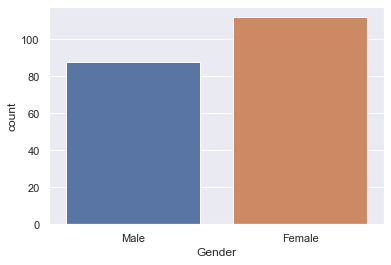

In [8]:
sns.countplot(df['Gender'])

In [9]:
df.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


In [10]:
X=df.drop(['CustomerID','Gender','Age'],axis=1)

### Kmeans Clustering

In [11]:
from sklearn.cluster import KMeans

In [17]:
Cost=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i).fit(X)
    Cost.append(kmeans.inertia_)
    
  

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Elbow

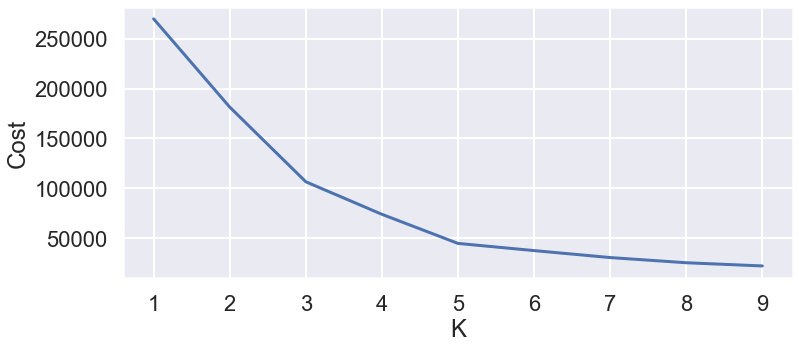

In [18]:
plt.figure(figsize=(12,5))
sns.set_context('poster')
plt.plot(range(1,10),Cost)
plt.xlabel('K')
plt.ylabel('Cost')
plt.show()

### Silhouette Score

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
s_score=[]
for i in range (2,10):
    kmeans=KMeans(n_clusters=i).fit(X)
    s_score.append(silhouette_score(X,kmeans.labels_))
s_score

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.53976103063432,
 0.5314247434775297,
 0.45492755850983463,
 0.4565077334305076]

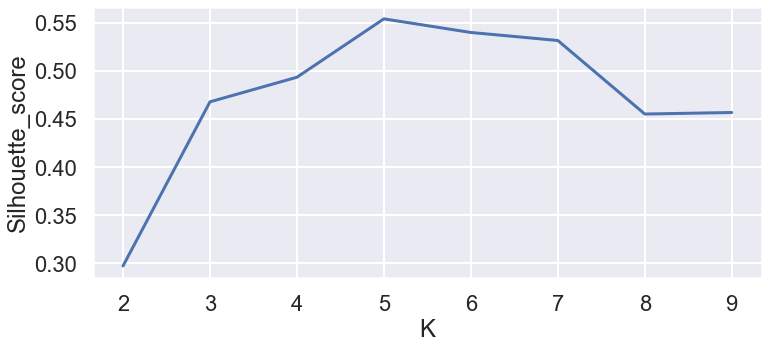

In [21]:
plt.figure(figsize=(12,5))
sns.set_context('poster')
plt.plot(range(2,10),s_score)
plt.xlabel('K')
plt.ylabel('Silhouette_score')
plt.show()

### Final Clusters

In [22]:
cluster_labels=KMeans(n_clusters=5).fit_predict(X)

In [23]:
pred=df.copy()

In [31]:
pred['Labels']=cluster_labels

In [32]:
pred.pivot_table(index=pred['Labels'],columns=['Gender'],values=['Annual Income (k$)','Spending Score (1-100)'],aggfunc='mean')

Annual Income (k$)            Spending Score (1-100)           
Gender             Female       Male                 Female       Male
Labels                                                                
0               86.047619  87.111111              81.666667  82.666667
1               55.354167  55.212121              49.000000  50.272727
2               90.937500  85.894737              22.062500  12.947368
3               25.692308  25.777778              80.538462  77.666667
4               27.357143  24.666667              21.714286  19.666667

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

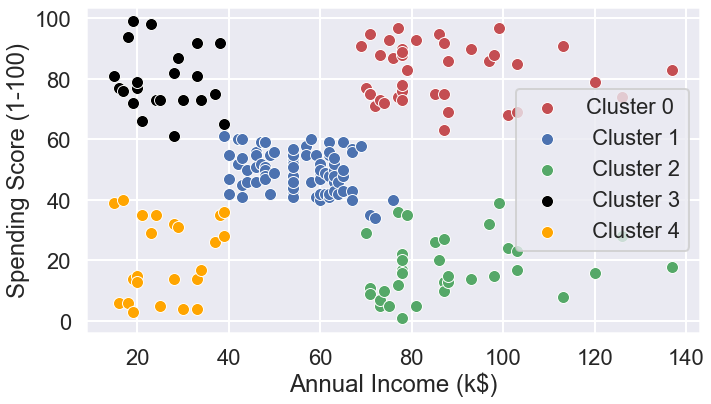

In [40]:
plt.figure(figsize=(11,6))
sns.scatterplot(x=pred.loc[pred.Labels==0,'Annual Income (k$)'],y=pred.loc[pred.Labels==0,'Spending Score (1-100)'],color='r',label='Cluster 0')
sns.scatterplot(x=pred.loc[pred.Labels==1,'Annual Income (k$)'],y=pred.loc[pred.Labels==1,'Spending Score (1-100)'],color='b',label=' Cluster 1')
sns.scatterplot(x=pred.loc[pred.Labels==2,'Annual Income (k$)'],y=pred.loc[pred.Labels==2,'Spending Score (1-100)'],color='g',label=' Cluster 2')
sns.scatterplot(x=pred.loc[pred.Labels==3,'Annual Income (k$)'],y=pred.loc[pred.Labels==3,'Spending Score (1-100)'],color='black',label=' Cluster 3')
sns.scatterplot(x=pred.loc[pred.Labels==4,'Annual Income (k$)'],y=pred.loc[pred.Labels==4,'Spending Score (1-100)'],color='orange',label=' Cluster 4')